<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/Transfer_Learning-Image-/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"
filename = "10_food_classes_10_percent.zip"
urllib.request.urlretrieve(url, filename)

('10_food_classes_10_percent.zip', <http.client.HTTPMessage at 0x7c5d1616b790>)

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [1]:
import os
import pathlib
import numpy as np

data_dir = pathlib.Path("10_food_classes_10_percent/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pathlib

def view_random_image(target_dir):
  target_dir = pathlib.Path(target_dir)
  class_names = np.array(sorted([item.name for item in target_dir.glob('*')]))
  rand_index = random.randint(0, len(class_names)-1)
  folder = target_dir / class_names[rand_index]
  img_path = folder / random.choice(os.listdir(folder))
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(class_names[rand_index])
  plt.axis(False)
  plt.show()

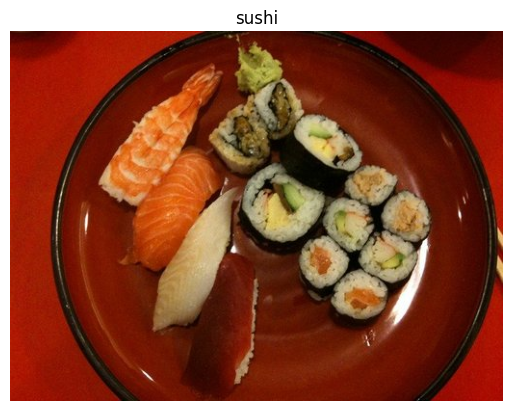

In [10]:
img = view_random_image("10_food_classes_10_percent/train")


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size=25,
                                               class_mode ='categorical'
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size=25,
                                               class_mode ='categorical'
                                               )

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [12]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [13]:
IMG_SHAPE = (224,224) + (3,)

In [20]:
import tensorflow_hub as hub
import tensorflow as tf

hub_layer = hub.KerasLayer("https://kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/1",
                   trainable=False)

hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: hub_layer(x))

m = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    hub_layer_wrapper,
    tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
m.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [27]:
history = m.fit(train_data,
                epochs=5,
                validation_data=test_data,
                callbacks=[create_tensorboard_callback("training_logs", "resnet_v2_10_percent_data")]
                )

Saving TensorBoard log files to: training_logs/resnet_v2_10_percent_data/20240805-100059
Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.9433 - loss: 0.2954 - val_accuracy: 0.7800 - val_loss: 0.6505
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.9618 - loss: 0.2249 - val_accuracy: 0.7840 - val_loss: 0.6372
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.9828 - loss: 0.1864 - val_accuracy: 0.7804 - val_loss: 0.6497
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.9811 - loss: 0.1633 - val_accuracy: 0.7824 - val_loss: 0.6358
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.9824 - loss: 0.1485 - val_accuracy: 0.7868 - val_loss: 0.6269
